MNIST 데이터 불러오기 및 정규화

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [36]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


CNN 모델 구축

In [37]:
cnn = Sequential()

In [38]:
cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

In [39]:
cnn.add(Flatten())

In [40]:
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [43]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [44]:
hist = cnn.fit(x_train,y_train,batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 44s 93ms/step - loss: 0.2475 - accuracy: 0.9247 - val_loss: 0.0511 - val_accuracy: 0.9841
Epoch 2/30
469/469 [==============================] - 45s 97ms/step - loss: 0.0878 - accuracy: 0.9740 - val_loss: 0.0404 - val_accuracy: 0.9863
Epoch 3/30
469/469 [==============================] - 43s 92ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 4/30
469/469 [==============================] - 42s 89ms/step - loss: 0.0527 - accuracy: 0.9828 - val_loss: 0.0302 - val_accuracy: 0.9904
Epoch 5/30
469/469 [==============================] - 42s 89ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0307 - val_accuracy: 0.9903
Epoch 6/30
469/469 [==============================] - 44s 93ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0276 - val_accuracy: 0.9910
Epoch 7/30
469/469 [==============================] - 44s 94ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0270 - val_accuracy:

In [45]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               1179776   
                                                      

In [46]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0350 - accuracy: 0.9930


[0.0350191667675972, 0.9929999709129333]

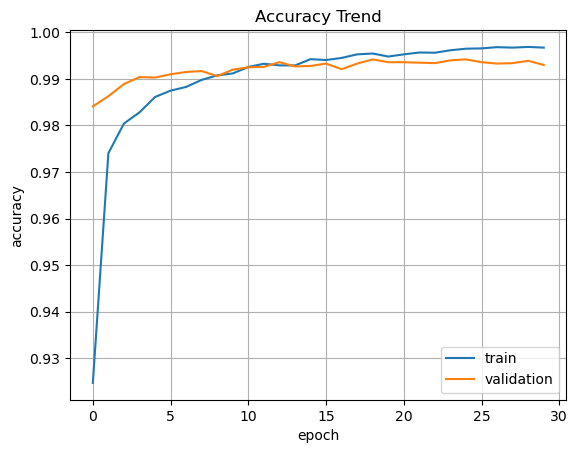

In [47]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()